## Завдання 1 

Імпортуємо усі необхідні пакети:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

Завантажимо дані в dataframe:

In [2]:
data = pd.read_csv("1895-2022.csv")
data.columns = ['Date', 'Temperature', 'Anomaly']
data.Date = data.Date.floordiv(100)
data.head()

,Date,Temperature,Anomaly
0,1895,17.6,-2.5
1,1896,17.2,-2.9
2,1897,19.3,-0.8
3,1898,20.8,0.7
4,1899,19.2,-0.9


Розбиваємо дані на навчальний і тестовий набори:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.Date.values.reshape(-1,1), 
                                                    data.Temperature.values, random_state=11)

Перевіримо пропорції навчальних та тестових даних:

In [4]:
X_train.shape

(96, 1)

In [5]:
X_test.shape


(32, 1)

Використаємо оцінювач LinearRegression:

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

Виведемо значення кута нахилу: 

In [7]:
linear_regression.coef_

array([0.01273911])

та точку перетину:

In [8]:
linear_regression.intercept_

-4.9820340444161815

Виведемо прогнозовані і очікувані значення для кожного
п'ятого елементу:

In [9]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p,e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 19.81, expected: 21.40
predicted: 20.14, expected: 22.00
predicted: 19.53, expected: 21.40
predicted: 19.95, expected: 14.50
predicted: 20.46, expected: 20.00
predicted: 20.76, expected: 24.00
predicted: 19.49, expected: 22.80


Спрогнозуємо результат для 2019 року:

In [10]:
predict = (lambda x : linear_regression.coef_ * x + linear_regression.intercept_)
print(predict(2019))

[20.73823167]


Побудуємо діаграму розкиду даних:

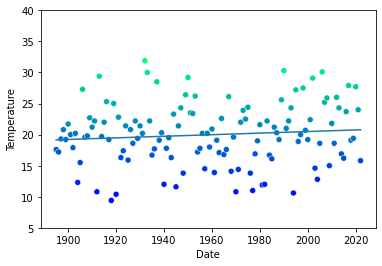

In [11]:
axes = sns.scatterplot(data=data, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(5, 40)
x = np.array([min(data.Date.values), max(data.Date.values)])
y = predict(x)
line = plt.plot(x,y)

axes.set_xlabel('Date')
axes.set_ylabel('Temperature')

plt.show()

## Завдання 2

Імпортуємо необхідні пакети:

In [12]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

Згенеруємо дані. Створимо мітки. Перевіримо значення ознаки у зразках на додатність. Виконаємо логічну операцію ХОR між умовами для отримання кінцевої мітки. Візуалізуємо також дані:

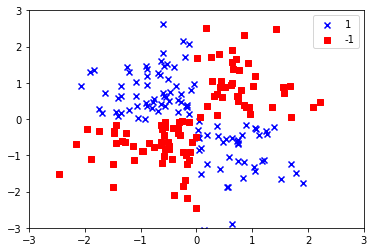

In [13]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

Виконаємо навчання на даних використовуючи алгоритм SMV та ядро rbf. Виконаємо візуалізацію: 

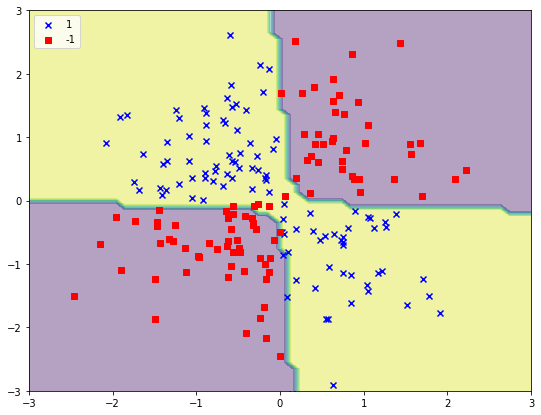

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=1)

svm = SVC(kernel='rbf', gamma=0.10, C=10)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

plt.figure(figsize=(9, 7))
x1_min, x1_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
x2_min, x2_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.legend(loc='upper left')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

## Завдання 3


Завантажимо набір даних про вино load_wine та виведемо елементи у шапці:

In [30]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine_data = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, test_size=0.2, random_state=15)

wine_dat = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_dat.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Завантажуємо додаткові бібліотеки для класифікаційних оцінювачів:


In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Створимо три класифікаційних оцінювачів, а саме KNeighborsClassifier, SVC(з лінійним ядром), та GaussianNB. Виконаємо навчання на тренувальних даних:

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Оцінимо точність класифікаторів та побудуємо для них гістограму для наочної візуалізації: 

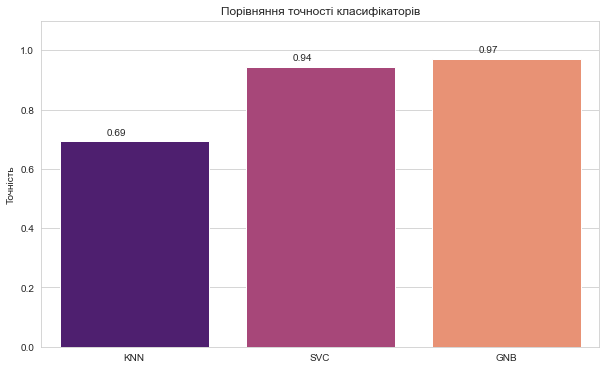

In [36]:
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)

gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)

classifier_labels = ['KNN', 'SVC', 'GNB']
classifier_accuracies = [knn_accuracy, svc_accuracy, gnb_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=classifier_labels, y=classifier_accuracies, palette="magma")

plt.ylim([0, 1.1])
plt.ylabel("Точність")
plt.title("Порівняння точності класифікаторів")

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.02))

plt.show()

